In [8]:
import numpy as np
import pandas as pd
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import statistics

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

In [9]:
### Ваши код/вычесления...
# по формуле нахождения точности можно выделить n - объем выборки
# формула нахождения точности accuracy = (sd/n**0.5) * z_a
# отсюда найдем n = ((sd*z_a)/accuracy)**2
accuracy = 3
sd = 225**0.5 # так как у нас дисперсия задана в квадратом отклонений, найдем стандартное отклонение
b = 0.95 # уровень доверия
# a = 1 - b уровень значимости (вероятность не попасть в доверительный интервал) в данном случае 0.05
z_a = 2.241 # квантиль нормального распределения 1 - a/2 = 0.975, по таблице двухстороння область 2.241
n = ((sd*z_a)/accuracy)**2
print(f'Минимальный объем выборки: {int(round(n, 0))}')

Минимальный объем выборки: 126


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [10]:
### Ваш код...
n = 25 # объем выборки
x = 130 # среднее значение по выборке
sd = 12 # стандартное отклонение
# Так как наш доверительный интервал с = 0.98, уровень значимости a = 1 - 0.98, a = 0.02
# находим квантиль нормального распределения z_a по уровню значимости 1 - a/2 = 1 - 0.02/2 = 0.99
# в таблице квантилей для значения 0.99 двухстороний уровень области = 2.576
z_a = 2.576
# по формуле посчитаем точность и доверительный интервал 
accuracy = (sd/n**0.5) * z_a # ошибка
interval_left = x - accuracy
interval_right = x + accuracy
print(f'Точность: {accuracy} \nУровень значимости левый 130 - 6.1824: {interval_left} \nУровень значимости правый 130 + 6.1824: {interval_right}')

Точность: 6.1824 
Уровень значимости левый 130 - 6.1824: 123.8176 
Уровень значимости правый 130 + 6.1824: 136.1824


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [43]:
population_men  = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
# найдем среднее по выборкам 
x_men = population_men.mean()
x_women = population_women.mean()

# найдем дисперсию по выборкам
v_men = population_men.std() 
v_women = population_women.std()

# объем выборок
size_men = len(population_men)
size_women = len(population_women)

# по формуле t-test определим, насколько наши выборки отличаются друг от друга
t = (x_men - x_women)/(v_men**2/size_men + v_women**2/size_women)**0.5
stats.ttest_ind(population_men, population_women) 
#  все равно в итоге не сходится значение, посчитанное по формуле и с помощью ttest_ind

Ttest_indResult(statistic=35.225989142095145, pvalue=8.286437178497796e-272)

In [44]:
t

41.94691322426358

In [42]:
t_

35.65316094796531

In [45]:
t < p

False

<function matplotlib.pyplot.show(*args, **kw)>

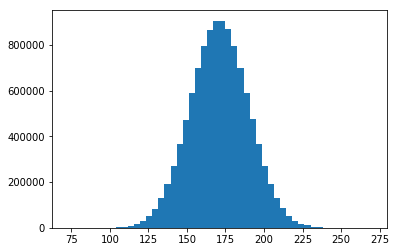

In [53]:
plt.hist(population_men, bins=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

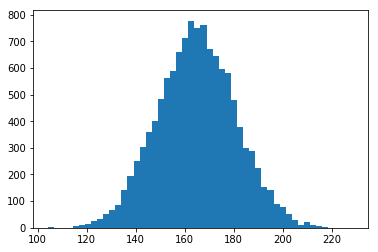

In [52]:
plt.hist(population_women, bins=50)
plt.show

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [177]:
### Ваш код...
sd = 150 # стандартное отклонение
b = 0.95 # уровень доверия
accuracy = 50 # погрешность
z_a = 2.241 # 1 - (1-b)/2 = 0.975
n = ((sd*z_a)/accuracy)**2
print(f'Минимальный объем выборки: {int(round(n, 0))}')

Минимальный объем выборки: 45


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [100]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [107]:
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact(observations) #   Возможно пригодится эта функция.
oddsratio
# если принять за 0 гипотезу, что маг не умеет предсказывать погоду, то есть нет зависимости  его ответов и 
# того, что произошло в реальности, то можно сделать следующий вывод:
# так как уровень значимости меньше, чем расчитанное значение по критерию Фишера
# мы можем сделать выводы об отсутствии статистически значимых различий 
# исходов и реальных событий, которые происходят
# соответсвенно маг не умеет предсказывать погоду
oddsratio > 0.05

True

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [13]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

def mean_confidence_interval(data, confidence=0.90):   
    # находим длину списка 
    n = len(data)
    # среднее значение по выборке и стандартную ошибку среднего
    m, se = np.mean(data), scipy.stats.sem(data)
    # умножаем стандартную ошибку на перцентиль
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    значение, после 
    return m-h, m, m+h  # левая и права часть от нешего среднего 
mean_confidence_interval(data)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

(array([1., 0., 0., 0., 2., 6., 7., 7., 6., 6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

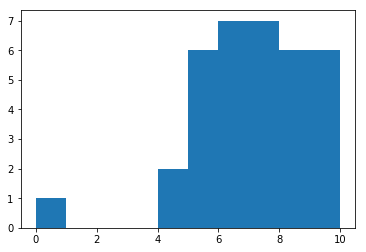

In [85]:
plt.hist(data, bins=10)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [88]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [89]:
# нулевая гипотеза: наши выборки пренадлежат одному множеству с уровнем значимости 5%
stats.ttest_ind(data_1, data_2) 
# в данном случае мы можем отвергнуть нашу нулевое гипотезу, так как pvalue < уровня значимости 0.05

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

(array([ 3.,  6.,  8., 18.,  0., 23., 19.,  9.,  4.,  3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

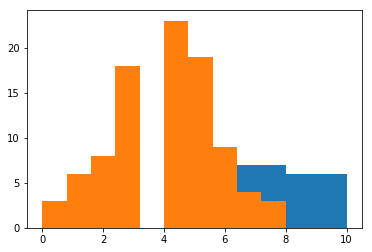

In [97]:
plt.hist(data_1)
plt.hist(data_2)
# выборки не пренадлежат одному множеству